# Mall Customers Excersises

in Clustering/Data Wrangle Exercises

1. Acquire data from mall_customers.customers in mysql database.
2. Summarize data (include distributions and descriptive statistics).
3. Detect outliers using IQR.
4. Split data (train-test-split).
5. Encode categorical columns using a one hot encoder.
6. Handles missing values.
7. Scaling

**wrangle_mall.py**

1. Acquire data from mall_customers.customers in mysql database.
2. Split the data
3. One-hot-encoding
4. Missing values
5. Scaling

In [6]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare

In [2]:
# 1. Acquire data from mall_customers.customers in mysql database.
df = acquire.get_mall_data()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB
None
               customer_id                  age        annual_income  \
count               200.00               200.00               200.00   
mean                100.50                38.85                60.56   
std                  57.88                13.97                26.26   
min                   1.00                18.00                15.00   
25%                  50.75                28.75                41.50   
50%                 100.50                36.00                61.50   
75%                 

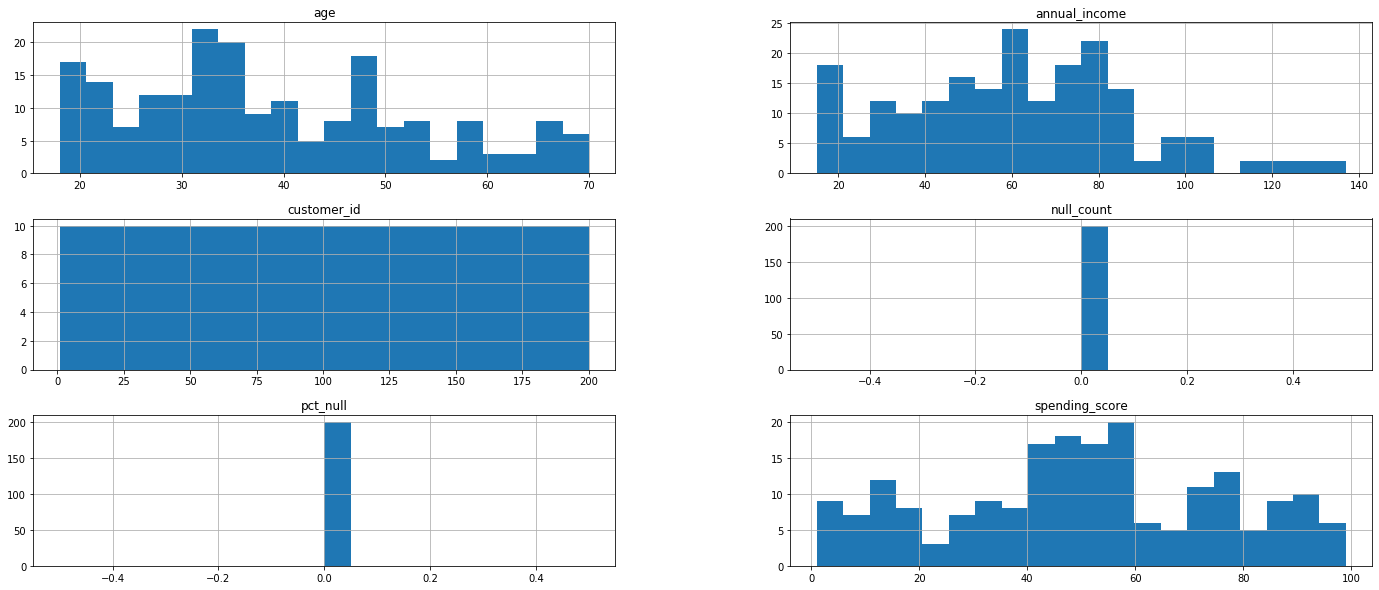

In [3]:
# 2. Summarize data (include distributions and descriptive statistics).
df = summarize.df_summary(df)

In [7]:
df['is_female'] = (df.gender == 'Female').astype('int')

AttributeError: 'numpy.ndarray' object has no attribute 'gender'

In [ ]:
malldf.head()

In [ ]:
# 3. Detect outliers using IQR.
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [ ]:
outliers = get_upper_outliers(s, k)

outliers